## NumPy, Pandas - exercises
### BIOINF 575 - Fall 2023



___

#### Processing the worm genome file - using pandas
You will do a quick exploration of the data in the the GFF3 file for the C. elegans genome. The GFF3 file is `Caenorhabditis_elegans.WBcel235.91.gff3` and is also available in the github repository (you should have it in the study session if you updated the repo). The GFF3 format is described on:
https://github.com/The-Sequence-Ontology/Specifications/blob/master/gff3.md.<br> 

After the comment and header lines (marked by "#"), a line in a GFF3 file (row of a table) is composed of 9 tab-delimited fields (columns). The first 8 are called features. These are all atomic (consist of only one element), so they get put into a dictionary features with no problems. You will need to define a key and you will have to generate those integers as you read the file in and add data to the dictionary.

The ninth field will pose more of a problem. It consists of tag-value pairs. **The tag-value pairs are separated by a semi-colon, ";". The the tag and value in a pair are  separated by equal signs, "=", and the values may consist of mulitiple, comma, ",", separated entries.** Also, any value may be encoded as html-safe encoding. Caution: the encoded characters may be the same as those used to separate the components of the attributes field. To get rid of the encoding (these are  pairs of characters or digits preceded by the % sign), use the unquote() function from urllib.parse (`from urllib.parse import unquote`). Just be careful of when you use it - do it at the wrong time and you will mess up the parsing of attributes.

From the definition of the GFF3 we have these fields

Each line contains the following information for a genomic features:  `seqid, source, type, start, end, score, strand, phase, attributes`.


The attributes column contains the following information: ;-separated pairs of tag=value, where the values may consist of mulitiple, comma, ",", separated entries.




____

### <font color = "red">Exercise</font>

#### - Load data from the file and get it ready for analysis:
- Open the `Caenorhabditis_elegans.WBcel235.91.gff3` and check the format.
- Read the data from the `Caenorhabditis_elegans.WBcel235.91.gff3` into a dataframe.
- Set the column names to: ` seqid, source, type, start, end, score, strand, phase, attributes`. 
- Set the row names to: `Feature0, ..., FeatureX, ... FeatureN`, where X is the row index and N the number of rows.




In [1]:
import numpy as np
import pandas as pd


# help(pd.read_csv)

# Also you can use the: contextual help 
# right click the notebook select > show contextual help
# select the tab of the contextual help from the tabs of the opened files
# drag and drop it to the right of your notebook window
# you should have something that looks like a split screen 
# with your notebook to the left anf the contextual help window on the right
# now on a cell in the notebook write a function name like abs, or print 
# - the help for the function should show in the right window  (contextual help window)



In [2]:
genome_df = pd.read_csv("Caenorhabditis_elegans.WBcel235.91.gff3", comment = "#", sep = "\t", header = None,
                       names = ["seqid", "source", "type", "start", "end", "score", "strand", "phase", "attributes"])
genome_df

,seqid,source,type,start,end,score,strand,phase,attributes
0,I,WormBase,chromosome,1,15072434,.,.,.,"ID=chromosome:I;Alias=BX284601.5,NC_003279.8"
1,I,WormBase,ncRNA_gene,3747,3909,.,-,.,ID=gene:WBGene00023193;Name=Y74C9A.6;biotype=s...
2,I,WormBase,snoRNA,3747,3909,.,-,.,ID=transcript:Y74C9A.6;Parent=gene:WBGene00023...
3,I,WormBase,exon,3747,3909,.,-,.,Parent=transcript:Y74C9A.6;Name=Y74C9A.6.e1;co...
4,I,WormBase,gene,4116,10230,.,-,.,ID=gene:WBGene00022277;Name=homt-1;biotype=pro...
...,...,...,...,...,...,...,...,...,...
659616,X,WormBase,exon,17717328,17717443,.,+,.,Parent=transcript:cTel55X.1a;Name=cTel55X.1a.e...
659617,X,WormBase,CDS,17717328,17717443,.,+,0,ID=CDS:cTel55X.1a;Parent=transcript:cTel55X.1a...
659618,X,WormBase,CDS,17718435,17718621,.,+,1,ID=CDS:cTel55X.1a;Parent=transcript:cTel55X.1a...
659619,X,WormBase,exon,17718435,17718720,.,+,.,Parent=transcript:cTel55X.1a;Name=cTel55X.1a.e...


In [3]:
row_labels = ["Feature" + str(i) for i in genome_df.index] 
row_labels = list(map(lambda i: "Feature" + str(i), genome_df.index))
row_labels[:5]

['Feature0', 'Feature1', 'Feature2', 'Feature3', 'Feature4']

In [4]:
row_labels[-5:]

['Feature659616',
 'Feature659617',
 'Feature659618',
 'Feature659619',
 'Feature659620']

In [5]:
genome_df.index = row_labels
genome_df.head()

,seqid,source,type,start,end,score,strand,phase,attributes
Feature0,I,WormBase,chromosome,1,15072434,.,.,.,"ID=chromosome:I;Alias=BX284601.5,NC_003279.8"
Feature1,I,WormBase,ncRNA_gene,3747,3909,.,-,.,ID=gene:WBGene00023193;Name=Y74C9A.6;biotype=s...
Feature2,I,WormBase,snoRNA,3747,3909,.,-,.,ID=transcript:Y74C9A.6;Parent=gene:WBGene00023...
Feature3,I,WormBase,exon,3747,3909,.,-,.,Parent=transcript:Y74C9A.6;Name=Y74C9A.6.e1;co...
Feature4,I,WormBase,gene,4116,10230,.,-,.,ID=gene:WBGene00022277;Name=homt-1;biotype=pro...


In [6]:
list(map(len,["ABC", "hello", "Hi"]))

[3, 5, 2]

___

### - Compute how many types of genomic features there are in our dataset and how many features of each kind. (e.g.: gene, exon, mRNA in the third column in the file are feature types)


#### If you are trying to do a common operation on a dataframe or Series (dataframe column) it may have already been implemented - look for a function that does what you need in the documentation.

Useful links to see the attributes (variables, properties) and methods (functions) a column of a pandas dataframe (Series) and a pandas dataframe has:    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [7]:
# pandas.core.series.Series.nunique(dropna: bool = True) -> int
# Returns the number of unique elements in the object.
# Excludes NA values by default.

genome_df.type.unique().size


19

In [8]:
genome_df.type.nunique()

19

In [9]:
type(genome_df.type.unique())

numpy.ndarray

In [10]:
genome_df.type.unique()

array(['chromosome', 'ncRNA_gene', 'snoRNA', 'exon', 'gene', 'mRNA',
       'three_prime_UTR', 'CDS', 'five_prime_UTR', 'pseudogene',
       'pseudogenic_transcript', 'piRNA', 'ncRNA', 'tRNA', 'lnc_RNA',
       'pre_miRNA', 'miRNA', 'snRNA', 'rRNA'], dtype=object)

In [11]:
#pandas.core.series.Series.value_counts(
#    normalize=False,
#    sort=True,
#    ascending=False,
#    bins=None,
#    dropna=True,
#)

#Returns a Series containing counts of unique values.
# The resulting object will be in descending order so that the
# first element is the most frequently-occurring element.
# Excludes NA values by default.



In [12]:
genome_df.type.value_counts()

exon                      269904
CDS                       222859
mRNA                       33391
five_prime_UTR             30960
three_prime_UTR            28004
ncRNA_gene                 24765
gene                       20222
piRNA                      15364
ncRNA                       8402
pseudogenic_transcript      1827
pseudogene                  1791
tRNA                         634
miRNA                        454
snoRNA                       345
lnc_RNA                      283
pre_miRNA                    257
snRNA                        130
rRNA                          22
chromosome                     7
Name: type, dtype: int64

___

### - Plot the distribution (histogram) of the length of the genomic features in the file

In [13]:
genome_df

,seqid,source,type,start,end,score,strand,phase,attributes
Feature0,I,WormBase,chromosome,1,15072434,.,.,.,"ID=chromosome:I;Alias=BX284601.5,NC_003279.8"
Feature1,I,WormBase,ncRNA_gene,3747,3909,.,-,.,ID=gene:WBGene00023193;Name=Y74C9A.6;biotype=s...
Feature2,I,WormBase,snoRNA,3747,3909,.,-,.,ID=transcript:Y74C9A.6;Parent=gene:WBGene00023...
Feature3,I,WormBase,exon,3747,3909,.,-,.,Parent=transcript:Y74C9A.6;Name=Y74C9A.6.e1;co...
Feature4,I,WormBase,gene,4116,10230,.,-,.,ID=gene:WBGene00022277;Name=homt-1;biotype=pro...
...,...,...,...,...,...,...,...,...,...
Feature659616,X,WormBase,exon,17717328,17717443,.,+,.,Parent=transcript:cTel55X.1a;Name=cTel55X.1a.e...
Feature659617,X,WormBase,CDS,17717328,17717443,.,+,0,ID=CDS:cTel55X.1a;Parent=transcript:cTel55X.1a...
Feature659618,X,WormBase,CDS,17718435,17718621,.,+,1,ID=CDS:cTel55X.1a;Parent=transcript:cTel55X.1a...
Feature659619,X,WormBase,exon,17718435,17718720,.,+,.,Parent=transcript:cTel55X.1a;Name=cTel55X.1a.e...


In [14]:
genome_df.start

Feature0                1
Feature1             3747
Feature2             3747
Feature3             3747
Feature4             4116
                   ...   
Feature659616    17717328
Feature659617    17717328
Feature659618    17718435
Feature659619    17718435
Feature659620    17718622
Name: start, Length: 659621, dtype: int64

In [15]:
genome_df.end

Feature0         15072434
Feature1             3909
Feature2             3909
Feature3             3909
Feature4            10230
                   ...   
Feature659616    17717443
Feature659617    17717443
Feature659618    17718621
Feature659619    17718720
Feature659620    17718720
Name: end, Length: 659621, dtype: int64

In [16]:
gf_len = genome_df.end - genome_df.start
gf_len

Feature0         15072433
Feature1              162
Feature2              162
Feature3              162
Feature4             6114
                   ...   
Feature659616         115
Feature659617         115
Feature659618         186
Feature659619         285
Feature659620          98
Length: 659621, dtype: int64

<AxesSubplot:>

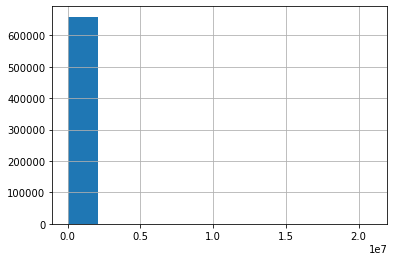

In [17]:
gf_len.hist()

<AxesSubplot:>

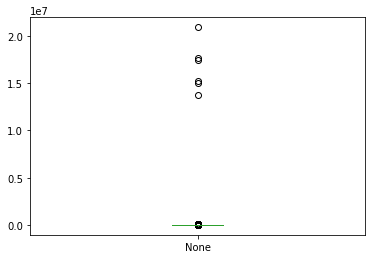

In [18]:
gf_len.plot(kind = "box")

In [19]:
sum(gf_len > 10000)

3750

In [20]:
(gf_len > 10000).sum()

3750

<AxesSubplot:>

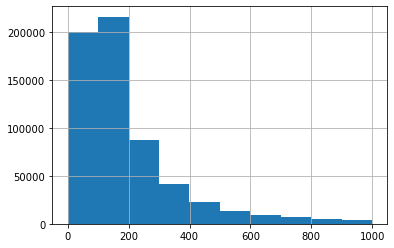

In [21]:
gf_len[gf_len < 1000].hist()

In [22]:
genome_df

,seqid,source,type,start,end,score,strand,phase,attributes
Feature0,I,WormBase,chromosome,1,15072434,.,.,.,"ID=chromosome:I;Alias=BX284601.5,NC_003279.8"
Feature1,I,WormBase,ncRNA_gene,3747,3909,.,-,.,ID=gene:WBGene00023193;Name=Y74C9A.6;biotype=s...
Feature2,I,WormBase,snoRNA,3747,3909,.,-,.,ID=transcript:Y74C9A.6;Parent=gene:WBGene00023...
Feature3,I,WormBase,exon,3747,3909,.,-,.,Parent=transcript:Y74C9A.6;Name=Y74C9A.6.e1;co...
Feature4,I,WormBase,gene,4116,10230,.,-,.,ID=gene:WBGene00022277;Name=homt-1;biotype=pro...
...,...,...,...,...,...,...,...,...,...
Feature659616,X,WormBase,exon,17717328,17717443,.,+,.,Parent=transcript:cTel55X.1a;Name=cTel55X.1a.e...
Feature659617,X,WormBase,CDS,17717328,17717443,.,+,0,ID=CDS:cTel55X.1a;Parent=transcript:cTel55X.1a...
Feature659618,X,WormBase,CDS,17718435,17718621,.,+,1,ID=CDS:cTel55X.1a;Parent=transcript:cTel55X.1a...
Feature659619,X,WormBase,exon,17718435,17718720,.,+,.,Parent=transcript:cTel55X.1a;Name=cTel55X.1a.e...


_____ 

### - Find the genes between positions: 4000 and 10000.
    - Hint: start and end (4th and 5th columns in the file) need to be between these numbers.

In [23]:
# conditional subsetting to select rows that meet the condition
# combine condition using & (bit-wise and operator) 
# use parantheses to evaluate the condition first 
# parantheses are needed because & has higher precedence than comparison operators (>, < , ==, ...)

c1 = genome_df.start > 4000
c2 = genome_df.end < 10000
c3 = genome_df.type == "gene"

cond_all = c1 & c2 & c3

genome_df[cond_all]


,seqid,source,type,start,end,score,strand,phase,attributes
Feature93697,II,WormBase,gene,6664,9486,.,+,.,ID=gene:WBGene00015287;Name=osta-1;biotype=pro...
Feature434203,MtDNA,WormBase,gene,4504,5621,.,+,.,ID=gene:WBGene00000829;Name=ctb-1;biotype=prot...
Feature434211,MtDNA,WormBase,gene,5678,6449,.,+,.,ID=gene:WBGene00010962;Name=ctc-3;biotype=prot...
Feature434219,MtDNA,WormBase,gene,6506,7808,.,+,.,ID=gene:WBGene00010963;Name=nduo-4;biotype=pro...
Feature434224,MtDNA,WormBase,gene,7827,9428,.,+,.,ID=gene:WBGene00010964;Name=ctc-1;biotype=prot...
Feature434291,V,WormBase,gene,6588,7822,.,-,.,ID=gene:WBGene00002061;Name=ife-3;biotype=prot...
Feature434364,V,WormBase,gene,8575,8739,.,-,.,ID=gene:WBGene00255704;Name=B0348.10;biotype=p...


In [24]:
# Conditional subsetting to retrieve rows that meet the condition
# we use .loc attribute when we want to also subset the columns

genome_df.loc[cond_all]

,seqid,source,type,start,end,score,strand,phase,attributes
Feature93697,II,WormBase,gene,6664,9486,.,+,.,ID=gene:WBGene00015287;Name=osta-1;biotype=pro...
Feature434203,MtDNA,WormBase,gene,4504,5621,.,+,.,ID=gene:WBGene00000829;Name=ctb-1;biotype=prot...
Feature434211,MtDNA,WormBase,gene,5678,6449,.,+,.,ID=gene:WBGene00010962;Name=ctc-3;biotype=prot...
Feature434219,MtDNA,WormBase,gene,6506,7808,.,+,.,ID=gene:WBGene00010963;Name=nduo-4;biotype=pro...
Feature434224,MtDNA,WormBase,gene,7827,9428,.,+,.,ID=gene:WBGene00010964;Name=ctc-1;biotype=prot...
Feature434291,V,WormBase,gene,6588,7822,.,-,.,ID=gene:WBGene00002061;Name=ife-3;biotype=prot...
Feature434364,V,WormBase,gene,8575,8739,.,-,.,ID=gene:WBGene00255704;Name=B0348.10;biotype=p...


In [25]:
genome_df.loc[cond_all, :"end"]

,seqid,source,type,start,end
Feature93697,II,WormBase,gene,6664,9486
Feature434203,MtDNA,WormBase,gene,4504,5621
Feature434211,MtDNA,WormBase,gene,5678,6449
Feature434219,MtDNA,WormBase,gene,6506,7808
Feature434224,MtDNA,WormBase,gene,7827,9428
Feature434291,V,WormBase,gene,6588,7822
Feature434364,V,WormBase,gene,8575,8739


____

We have a file with the gene expression for 45h every three hours for breast cancer cells treated with a HER2 inhibitor, `GSE22955_small_gene_table.txt`.
This is in the class_notebooks folder.
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE22955

____

### <font color = "red">Exercise</font>

______

### - Select only 5 genes of interest from the expression data frame TP53, BARD1, BRCA1, MAPK1, CHEK2

In [26]:
important_genes = ("TP53", "BARD1", "BRCA1", "MAPK1", "CHEK2")

In [27]:
genes_df = pd.read_csv("GSE22955_small_gene_table.txt", comment = "#", sep = "\t", index_col = 0)
genes_df

,0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45
Symbol,,,,,,,,,,,,,,,,
ABCA1,7.497117,8.184737,8.384009,8.654385,8.705771,9.266485,9.097249,8.980061,8.911098,9.377178,9.142381,9.314741,9.622010,9.543455,9.559486,10.094392
ABCC11,9.681143,9.687135,9.498255,9.357438,9.189169,9.049327,8.976153,8.978854,8.967797,8.912375,8.851690,8.787110,8.679719,8.771382,8.633315,8.703377
ABCC3,12.834826,12.841947,12.924113,12.810950,12.990568,12.791429,12.410250,12.343846,11.682339,11.369507,11.188391,11.105528,11.343285,11.151681,11.214401,10.928790
ABLIM1,10.786000,10.912505,11.060394,11.091041,11.166662,11.293522,11.355008,11.331177,11.649917,11.622126,11.733842,11.772563,11.909730,11.724674,11.835192,11.720621
ABP1,7.943247,8.121638,8.293621,8.314716,8.345499,8.414776,8.368459,8.539609,8.649921,8.698824,8.688555,8.762338,9.098345,9.294049,9.323449,9.729671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF606,8.528510,8.394945,8.560340,8.955600,8.972039,8.858380,8.986870,9.040801,9.199987,9.201530,9.096592,9.201962,9.113082,9.238377,8.999179,9.076324
ZNF616,9.533892,9.671308,9.998892,10.189743,10.348529,10.293577,10.457835,10.426120,10.290234,10.279000,10.247908,10.289320,10.175219,10.316580,10.406839,10.225305
ZNF83,9.363751,9.162289,9.199572,9.589662,10.164692,10.039752,10.300014,10.099996,10.102037,9.971016,9.992117,10.033500,10.252678,10.170821,10.269105,9.959197


In [28]:
my_gene = genes_df.loc["ABCA1",:]
my_gene # this is a series

0      7.497117
3      8.184737
6      8.384009
9      8.654385
12     8.705771
15     9.266485
18     9.097249
21     8.980061
24     8.911098
27     9.377178
30     9.142381
33     9.314741
36     9.622010
39     9.543455
42     9.559486
45    10.094392
Name: ABCA1, dtype: float64

In [29]:
# if I transpose my matrix rows become columns and 
# if the names are proper variable names 
# I can access them using the dot notation

genes_df.T.ABCA1

0      7.497117
3      8.184737
6      8.384009
9      8.654385
12     8.705771
15     9.266485
18     9.097249
21     8.980061
24     8.911098
27     9.377178
30     9.142381
33     9.314741
36     9.622010
39     9.543455
42     9.559486
45    10.094392
Name: ABCA1, dtype: float64

### - Plot the expression of these genes 

In [30]:
important_genes

('TP53', 'BARD1', 'BRCA1', 'MAPK1', 'CHEK2')

In [31]:
my_genes = genes_df.loc[important_genes,:]
my_genes

,0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45
Symbol,,,,,,,,,,,,,,,,
TP53,9.200789,9.216372,9.050205,8.810025,9.228241,9.129489,9.071350,8.876624,8.701105,8.716909,8.430416,8.595401,8.520036,8.257401,8.218460,7.982049
BARD1,10.221535,10.701018,10.413019,10.139816,9.597768,9.822128,9.577566,9.318428,9.632759,9.462205,9.476985,9.339228,9.134728,9.157332,9.273025,9.558056
BRCA1,9.940983,10.037104,10.061594,9.833829,9.139316,8.980142,8.951006,8.806894,9.003011,8.885428,8.816547,8.724686,8.402657,8.386593,8.396024,8.605764
MAPK1,10.219226,10.129187,10.040317,9.765913,9.617056,9.417145,9.727285,9.632413,9.604481,9.375869,9.533505,9.526265,9.521666,9.490718,9.360262,9.597784
CHEK2,10.281308,10.158531,10.153390,10.126042,10.300719,10.281632,10.089970,10.184045,9.777084,9.990490,9.657020,9.736517,9.368978,9.328541,9.175359,9.412664


<AxesSubplot:>

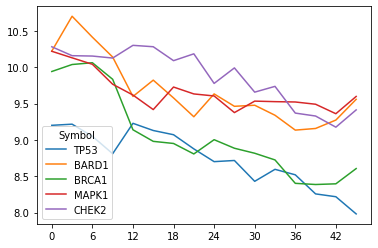

In [32]:
my_genes.T.plot()

In [33]:
? genes.merge

Object ` genes.merge` not found.


In [34]:
# dataframe merging

# putting two dataframes together

genes = pd.DataFrame(data = [["BRCA1", 100, 2],["PIK3CA", 20, 5],["TP53", 500, 30]], 
                     columns = ["Symbol", "Expr", "SNPs"])
genes

,Symbol,Expr,SNPs
0,BRCA1,100,2
1,PIK3CA,20,5
2,TP53,500,30


In [35]:
go_genes = pd.DataFrame(data = [["BRCA1","apoptosis"],
                              ["PIK3CA", "metabolism"],
                              ["PIK3CA", "cellular proliferation"],
                              ["PIK3CA", "DNA replication"]], 
                     columns = ["Symbol", "GO_term"])
go_genes

,Symbol,GO_term
0,BRCA1,apoptosis
1,PIK3CA,metabolism
2,PIK3CA,cellular proliferation
3,PIK3CA,DNA replication


In [36]:
genes.merge(go_genes)

,Symbol,Expr,SNPs,GO_term
0,BRCA1,100,2,apoptosis
1,PIK3CA,20,5,metabolism
2,PIK3CA,20,5,cellular proliferation
3,PIK3CA,20,5,DNA replication


In [37]:
genes.merge(go_genes, how = "left")

,Symbol,Expr,SNPs,GO_term
0,BRCA1,100,2,apoptosis
1,PIK3CA,20,5,metabolism
2,PIK3CA,20,5,cellular proliferation
3,PIK3CA,20,5,DNA replication
4,TP53,500,30,NaN


In [38]:
# apply a function to each element of a series

go_genes.GO_term.apply(len)

0     9
1    10
2    22
3    15
Name: GO_term, dtype: int64

In [39]:
# apply a function to the columns of a dataframe
# each column will be passed to the function 
# as the first parameter of the function

genes.apply(min)

Symbol    BRCA1
Expr         20
SNPs          2
dtype: object

In [40]:
genes

,Symbol,Expr,SNPs
0,BRCA1,100,2
1,PIK3CA,20,5
2,TP53,500,30


In [41]:
genes_num = genes.loc[:,"Expr":]
genes_num.index = genes.Symbol
genes_num

,Expr,SNPs
Symbol,,
BRCA1,100,2
PIK3CA,20,5
TP53,500,30


In [42]:
# apply a function to the rows of a dataframe
# each row will be passed to the function 
# as the first parameter of the function
# the function has to be applicable to a row of the data frame

genes_num.apply(min, axis = 1)

Symbol
BRCA1      2
PIK3CA     5
TP53      30
dtype: int64

In [43]:
# what if the function has other parameters?
sum?

Signature: sum(iterable, /, start=0)
Docstring:
Return the sum of a 'start' value (default: 0) plus an iterable of numbers

When the iterable is empty, return the start value.
This function is intended specifically for use with numeric values and may
reject non-numeric types.
Type:      builtin_function_or_method


In [44]:
# use in the apply the parameter of the function you are applying

genes.loc[:, "Expr":].apply(sum, start = 1)

Expr    621
SNPs     38
dtype: int64

In [45]:
genes.loc[:, "Expr":].apply(sum, start = 0)

Expr    620
SNPs     37
dtype: int64

In [46]:
genes.loc[:, "Expr":]

,Expr,SNPs
0,100,2
1,20,5
2,500,30



### - Select only genes that have a standard dev > 0.7 and a change between hour 0 and hour 45 > 1.4 fold.


In [47]:
genes_df

,0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45
Symbol,,,,,,,,,,,,,,,,
ABCA1,7.497117,8.184737,8.384009,8.654385,8.705771,9.266485,9.097249,8.980061,8.911098,9.377178,9.142381,9.314741,9.622010,9.543455,9.559486,10.094392
ABCC11,9.681143,9.687135,9.498255,9.357438,9.189169,9.049327,8.976153,8.978854,8.967797,8.912375,8.851690,8.787110,8.679719,8.771382,8.633315,8.703377
ABCC3,12.834826,12.841947,12.924113,12.810950,12.990568,12.791429,12.410250,12.343846,11.682339,11.369507,11.188391,11.105528,11.343285,11.151681,11.214401,10.928790
ABLIM1,10.786000,10.912505,11.060394,11.091041,11.166662,11.293522,11.355008,11.331177,11.649917,11.622126,11.733842,11.772563,11.909730,11.724674,11.835192,11.720621
ABP1,7.943247,8.121638,8.293621,8.314716,8.345499,8.414776,8.368459,8.539609,8.649921,8.698824,8.688555,8.762338,9.098345,9.294049,9.323449,9.729671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF606,8.528510,8.394945,8.560340,8.955600,8.972039,8.858380,8.986870,9.040801,9.199987,9.201530,9.096592,9.201962,9.113082,9.238377,8.999179,9.076324
ZNF616,9.533892,9.671308,9.998892,10.189743,10.348529,10.293577,10.457835,10.426120,10.290234,10.279000,10.247908,10.289320,10.175219,10.316580,10.406839,10.225305
ZNF83,9.363751,9.162289,9.199572,9.589662,10.164692,10.039752,10.300014,10.099996,10.102037,9.971016,9.992117,10.033500,10.252678,10.170821,10.269105,9.959197


In [48]:
# standard dev > 0.7

In [49]:
# the function to compute the standard deviation 
# is in the statistics module
# we we use import to bring it into the environment

from statistics import stdev

In [50]:
?stdev

Signature: stdev(data, xbar=None)
Docstring:
Return the square root of the sample variance.

See ``variance`` for arguments and other details.

>>> stdev([1.5, 2.5, 2.5, 2.75, 3.25, 4.75])
1.0810874155219827
File:      ~/opt/anaconda3/lib/python3.9/statistics.py
Type:      function


In [51]:
# call the stdev function
stdev([1,2,3])

1.0

In [52]:
# call the stdev function on a gene
genes_df.T.ABCA1

0      7.497117
3      8.184737
6      8.384009
9      8.654385
12     8.705771
15     9.266485
18     9.097249
21     8.980061
24     8.911098
27     9.377178
30     9.142381
33     9.314741
36     9.622010
39     9.543455
42     9.559486
45    10.094392
Name: ABCA1, dtype: float64

In [53]:
stdev(genes_df.T.ABCA1)

0.6348286679821595

In [54]:
# look at the first 5 rows of the transposed matrix
genes_df.T.head()

Symbol,ABCA1,ABCC11,ABCC3,ABLIM1,ABP1,ACBD7,ACLY,ACOT4,ACOT7,ACPP,...,ZNF224,ZNF227,ZNF277,ZNF447,ZNF581,ZNF606,ZNF616,ZNF83,ZNFX1,ZWINT
0,7.497117,9.681143,12.834826,10.786000,7.943247,8.571854,13.381962,11.728720,13.598253,9.848121,...,9.014737,8.661490,11.490458,9.994247,11.700511,8.528510,9.533892,9.363751,10.854597,10.024858
3,8.184737,9.687135,12.841947,10.912505,8.121638,8.645659,13.246261,11.629999,13.604827,10.147549,...,9.133350,8.883227,11.891197,9.815544,12.079491,8.394945,9.671308,9.162289,10.662256,9.905496
6,8.384009,9.498255,12.924113,11.060394,8.293621,8.178287,13.097285,10.923922,13.339805,10.337497,...,9.576027,8.628353,12.319666,9.889774,12.145082,8.560340,9.998892,9.199572,11.023671,9.976799
9,8.654385,9.357438,12.810950,11.091041,8.314716,8.954513,12.917493,10.624697,12.807434,10.464989,...,9.635622,8.997452,12.424125,10.325372,12.542448,8.955600,10.189743,9.589662,11.415034,10.133369
12,8.705771,9.189169,12.990568,11.166662,8.345499,9.435023,12.430767,10.431445,11.948440,10.331273,...,9.988150,9.122626,12.486896,10.886342,12.271095,8.972039,10.348529,10.164692,11.720743,9.311503


In [55]:
# apply the stdev function on each column of a dataframe
# notice that we transpose the dataframe so we have genes on the columns

genes_df.T.apply(stdev)

Symbol
ABCA1     0.634829
ABCC11    0.343696
ABCC3     0.803495
ABLIM1    0.355669
ABP1      0.483524
            ...   
ZNF606    0.257139
ZNF616    0.257465
ZNF83     0.375355
ZNFX1     0.369599
ZWINT     0.653463
Length: 1175, dtype: float64

In [56]:
# apply the stdev function on each row of a dataframe
# notice that on the transpose data the rows are timepoints/hours

genes_df.T.apply(stdev, axis = 1)

0     1.674171
3     1.657662
6     1.639572
9     1.633384
12    1.653671
15    1.662806
18    1.669169
21    1.681597
24    1.685060
27    1.685051
30    1.695271
33    1.713556
36    1.764251
39    1.770367
42    1.776620
45    1.791799
dtype: float64

In [57]:
# apply the stdev function on each column of a dataframe
# notice that on the gene_df dataframe the genes are on the rows

genes_sd = genes_df.apply(stdev, axis = 1)
genes_sd

Symbol
ABCA1     0.634829
ABCC11    0.343696
ABCC3     0.803495
ABLIM1    0.355669
ABP1      0.483524
            ...   
ZNF606    0.257139
ZNF616    0.257465
ZNF83     0.375355
ZNFX1     0.369599
ZWINT     0.653463
Length: 1175, dtype: float64

In [58]:
# take the genes with the sd > 0.7

genes_sd[genes_sd > 0.7]

Symbol
ABCC3     0.803495
ACOT7     0.862160
ADCY3     0.718903
ADH1A     1.277729
ADH1C     1.250391
            ...   
UBE2T     0.955092
UPP1      0.947394
VSIG2     0.887242
VTCN1     0.892467
WDR51A    0.773601
Length: 153, dtype: float64

In [59]:
# change between hour 0 and hour 45 > 1.4 fold
# get column with name 45 
# get column with name 0
# and do the ratio

genes_df["45"]/genes_df["0"] 

Symbol
ABCA1     1.346437
ABCC11    0.899003
ABCC3     0.851495
ABLIM1    1.086651
ABP1      1.224898
            ...   
ZNF606    1.064233
ZNF616    1.072522
ZNF83     1.063591
ZNFX1     1.071376
ZWINT     0.812126
Length: 1175, dtype: float64

In [60]:
# change between hour 0 and hour 45 > 1.4 fold
# get column with name 45 
# get column with name 0
# and do the ratio

g_t1 = genes_df["45"]
g_t2 = genes_df["0"]
fold = 1.4
g_fold_cond = (g_t1/g_t2 > fold) | (g_t2/g_t1 > fold)
g_fold_cond

Symbol
ABCA1     False
ABCC11    False
ABCC3     False
ABLIM1    False
ABP1      False
          ...  
ZNF606    False
ZNF616    False
ZNF83     False
ZNFX1     False
ZWINT     False
Length: 1175, dtype: bool

In [61]:
g_sd_cond = genes_sd > 0.7
g_sd_cond

Symbol
ABCA1     False
ABCC11    False
ABCC3      True
ABLIM1    False
ABP1      False
          ...  
ZNF606    False
ZNF616    False
ZNF83     False
ZNFX1     False
ZWINT     False
Length: 1175, dtype: bool

In [62]:
# get the row labels/genes that meet both conditions

genes_df.index.values[g_fold_cond & g_sd_cond]

array(['ADH1A', 'ADH1C', 'CCL2', 'CYP1A1', 'IL8'], dtype=object)

In [63]:
# get the rows/genes (with expression values) that meet both conditions

genes_df[g_fold_cond & g_sd_cond]

,0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45
Symbol,,,,,,,,,,,,,,,,
ADH1A,8.361994,8.827013,9.378511,10.566180,10.256555,10.407172,10.765887,11.121747,11.493566,11.771011,11.687379,12.114453,12.009896,12.204300,12.262426,12.550255
ADH1C,8.209849,8.367908,9.104123,10.062300,9.829055,10.213800,10.530419,10.707635,11.252292,11.370705,11.445012,11.786950,11.793588,11.939639,11.775485,11.926255
CCL2,12.619085,10.091347,9.562717,8.840072,9.008635,8.701372,8.561566,8.548134,8.454427,8.483174,8.257832,8.184132,8.188751,8.304568,8.349592,7.823147
CYP1A1,8.852036,10.607981,10.871058,11.003644,11.880618,11.771992,12.114453,12.089954,11.968187,11.716474,12.266210,12.208526,12.635865,12.350391,12.503475,12.692957
IL8,13.985411,11.492268,11.320368,10.591507,11.323523,10.572259,10.376082,10.481849,10.061828,10.021562,10.040720,10.002081,9.865461,9.820557,9.671547,9.690952


____

[ClinVar][1] is a freely accessible, public archive of reports of the relationships among human variations and phenotypes, with supporting evidence.


The data you will be working with (`clinvar.vcf`).  More information about the database can be found [here][3].

From: https://ftp.ncbi.nlm.nih.gov/pub/clinvar/vcf_GRCh38/

Download the file clinvar.vcf.gz


### The file format
The beginning of every VCF file contains various sets of information:
* Meta-information (details about the experiment or configuration) lines start with **`##`**
    * These lines are helpful in understanding specialized keys found in the `INFO` column. It is in these sections that one can find:
        * The description of the key
        * The data type of the values
        * The default value of the values
* Header lines (column names) start with **`#`**

From there on, each line is made up of tab (`\t`) separated values that make up eight (8) columns. Those columns are:
1. CHROM (chromosome)
2. POS (base pair position of the variant)
3. ID (identifier if applicable; `.` if not applicable/missing)
4. REF (reference base)
5. ALT (alternate base(s): comma (`,`) separated if applicable)
6. QUAL (Phred-scaled quality score; `.` if not applicable/missing)
7. FILTER (filter status; `.` if not applicable/missing)
8. INFO (any additional information about the variant)
    * Semi-colon (`;`) separated key-value pairs
    * Key-value pairs are equal sign (`=`) separated (key on the left, value on the right)
    * If a key has multiple values, the values are pipe (`|`) separated

---
[1] https://www.ncbi.nlm.nih.gov/clinvar/intro/  
[2] https://samtools.github.io/hts-specs/VCFv4.3.pdf  
[3] http://exac.broadinstitute.org  



____

### <font color = "red">Exercise</font>

___

### - From the VCF file extract the variant position information and plot the distribution (histogram)


In [64]:
vcf_df = pd.read_csv("clinvar_short.vcf", comment = "#", sep = "\t",
                    names = ["CHROM","POS","ID","REF","ALT","QUAL","FILTER","INFO"])
vcf_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO
0,1,1014012,661610,C,T,.,.,"ALLELEID=626468;CLNDISDB=MedGen:C4015293,OMIM:..."
1,1,1014042,475283,G,A,.,.,AF_ESP=0.00546;AF_EXAC=0.00165;AF_TGP=0.00619;...
2,1,1014047,639487,A,G,.,.,"ALLELEID=626469;CLNDISDB=MedGen:C4015293,OMIM:..."
3,1,1014111,659187,G,A,.,.,"ALLELEID=626470;CLNDISDB=MedGen:C4015293,OMIM:..."
4,1,1014122,542074,C,T,.,.,AF_ESP=0.00015;AF_EXAC=0.00010;ALLELEID=514926...
...,...,...,...,...,...,...,...,...
967,1,2306313,676028,T,C,.,.,ALLELEID=657445;CLNDISDB=MedGen:CN517202;CLNDN...
968,1,2306534,674447,A,G,.,.,ALLELEID=657350;CLNDISDB=MedGen:CN517202;CLNDN...
969,1,2306561,388616,C,T,.,.,ALLELEID=364745;CLNDISDB=MedGen:CN169374;CLNDN...
970,1,2306568,463403,C,G,.,.,"ALLELEID=447533;CLNDISDB=MedGen:C1321551,OMIM:..."


<AxesSubplot:>

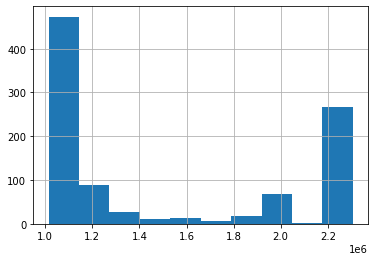

In [65]:
# plot the distribution of the variant position
# variants tend to pile at the beginning or the end of the chromosome 
# keep in mind I ran this on the short version of the file 
# these are not all the variants for this sample

vcf_df.POS.hist()

### - From the VCF file identify the genes for each variant from the info column GENEINFO key - write a function that identifies the genes for each variant


In [66]:
def get_gene(info):
    info_dict = {}
    for pair in info.strip().split(";"):
        key, values = pair.split("=")
        info_dict[key] = values.split("|")
    return info_dict.get("GENEINFO",None)

In [67]:
# first variant info value 
vcf_df.INFO[0]

# see the gene info
# GENEINFO=ISG15:9636

'ALLELEID=626468;CLNDISDB=MedGen:C4015293,OMIM:616126,Orphanet:ORPHA319563;CLNDN=Immunodeficiency_38_with_basal_ganglia_calcification;CLNHGVS=NC_000001.11:g.1014012C>T;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Uncertain_significance;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;GENEINFO=ISG15:9636;MC=SO:0001583|missense_variant;ORIGIN=1'

In [68]:
# get the gene info for the first variant
# GENEINFO=ISG15:9636
# the result is a list 
# expected value: ["ISG15:9636"]
# it contains the gene symbol and entrez ID - id in the ncbi databe

get_gene(vcf_df.INFO[0])

['ISG15:9636']

In [69]:
# get gene info for all variants
vcf_df.INFO.apply(get_gene)

0      [ISG15:9636]
1      [ISG15:9636]
2      [ISG15:9636]
3      [ISG15:9636]
4      [ISG15:9636]
           ...     
967      [SKI:6497]
968      [SKI:6497]
969      [SKI:6497]
970      [SKI:6497]
971      [SKI:6497]
Name: INFO, Length: 972, dtype: object

In [70]:
# get gene info for all variants
vcf_df.INFO.apply(get_gene).value_counts()

[AGRN:375790]        450
[SKI:6497]           257
[GABRD:2563]          65
[B3GALT6:126792]      53
[TNFRSF4:7293]        25
[DVL1:1855]           24
[ISG15:9636]          23
[ATAD3A:55210]        13
[GNB1:2782]           12
[TMEM240:339453]       7
[MXRA8:54587]          1
[MIB2:142678]          1
[CDK11B:984]           1
[SLC35E2B:728661]      1
[CDK11A:728642]        1
[CPTP:80772]           1
[PRKCZ:5590]           1
Name: INFO, dtype: int64

In [71]:
# we see that the variant is specific to the gene
# so we use a lambda function to get the first list element 
# split by : and then take the first element
# we could also do this in the get_gene function

gi_series = vcf_df.INFO.apply(get_gene)
# remove none
#gi_series = gi_series[gi_series.isna() == False]
gene_series = gi_series.apply(lambda gi:  gi[0].split(":")[0] if gi!=None else None)
gene_series

0      ISG15
1      ISG15
2      ISG15
3      ISG15
4      ISG15
       ...  
967      SKI
968      SKI
969      SKI
970      SKI
971      SKI
Name: INFO, Length: 972, dtype: object

In [72]:
# how many variants does each gene have

gene_series.value_counts()

AGRN        450
SKI         257
GABRD        65
B3GALT6      53
TNFRSF4      25
DVL1         24
ISG15        23
ATAD3A       13
GNB1         12
TMEM240       7
MXRA8         1
MIB2          1
CDK11B        1
SLC35E2B      1
CDK11A        1
CPTP          1
PRKCZ         1
Name: INFO, dtype: int64



### - Select only the variants for our 5 genes of interest from the expression data frame TP53, BARD1, BRCA1, MAPK1, CHEK2

In [73]:
important_genes = ("TP53", "BARD1", "BRCA1", "MAPK1", "CHEK2")

In [74]:
# none of the genes in the tuple have variants in our short vcf file
# we change the important genes

important_genes = ("CPTP", "BARD1", "TMEM240", "MAPK1", "GNB1")


In [75]:
gene_series

0      ISG15
1      ISG15
2      ISG15
3      ISG15
4      ISG15
       ...  
967      SKI
968      SKI
969      SKI
970      SKI
971      SKI
Name: INFO, Length: 972, dtype: object

In [76]:
cond = gene_series.apply(lambda g: g in important_genes)
cond

0      False
1      False
2      False
3      False
4      False
       ...  
967    False
968    False
969    False
970    False
971    False
Name: INFO, Length: 972, dtype: bool

In [77]:
# retrieve rows that meet the condition sd > 0.7 and 0-45h ratio > 1.4
# also exclude the last 3 columns 
# - filter and quality do not have data
# - info - too much text there we will add only the gene as a separate/new column
vcf_df1 = vcf_df[cond].iloc[:,:-3]

# add only the gene as a separate/new column
# use the genes series we created with the gene for each variant/row
# retrieve only the genes for variants that meet the condition 
# this is to match the dataframe we just created vcf_df1
gene_col = gene_series[cond]
# give the pd.Series a name
gene_col.name = "GENE"
# add the column to the dataframe
vcf_df2 = vcf_df1.join(gene_col)
vcf_df2

,CHROM,POS,ID,REF,ALT,GENE
562,1,1327311,638375,G,T,CPTP
603,1,1535392,161193,G,C,TMEM240
604,1,1535428,593226,G,A,TMEM240
605,1,1535457,393221,G,A,TMEM240
606,1,1535589,373233,C,T,TMEM240
608,1,1535618,437011,A,G,TMEM240
609,1,1535619,523023,C,T,TMEM240
611,1,1535766,372833,C,T,TMEM240
616,1,1787340,521025,GATC,G,GNB1
618,1,1789102,444148,G,A,GNB1


In [78]:
# join does not change the dataframe - it creates a new one 
# vcf_df1 is still without the gene column

vcf_df1

,CHROM,POS,ID,REF,ALT
562,1,1327311,638375,G,T
603,1,1535392,161193,G,C
604,1,1535428,593226,G,A
605,1,1535457,393221,G,A
606,1,1535589,373233,C,T
608,1,1535618,437011,A,G
609,1,1535619,523023,C,T
611,1,1535766,372833,C,T
616,1,1787340,521025,GATC,G
618,1,1789102,444148,G,A
